<a href="https://colab.research.google.com/github/saiful1604008/Thesis/blob/main/Final_CNN_Model_(150%2C300)(Seizure_Detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
import os 
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Loading the Dataset

In [3]:
data_dir = "/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/"
num_classes = 2

# Train Test Split

In [4]:
datagen = ImageDataGenerator(
    rescale = 1.0/255,
    validation_split = 0.25
)

train_gen = datagen.flow_from_directory(
    directory= data_dir,
    target_size = (150,300),
    batch_size = 30,
    color_mode = 'rgb',
    shuffle = True,
    subset = 'training',
    class_mode = 'binary'
)

valid_gen = datagen.flow_from_directory(
    directory= data_dir,
    target_size = (150,300),
    batch_size = 30,
    color_mode = 'rgb',
    shuffle = False,
    subset = 'validation',
    class_mode = 'binary'

)

Found 760 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [5]:
input_shape = train_gen.image_shape
input_shape

(150, 300, 3)

In [6]:
valid_gen.class_indices

{'Normal': 0, 'Seizure': 1}

# Building CNN Model

In [7]:
model = Sequential([
                    Conv2D(16,(6,6),
                            strides=2,
                            activation="relu",
                            padding='same',
                            input_shape=input_shape),
                    MaxPooling2D(pool_size = 2,strides=1),
                    Dropout(0.5),
                    Conv2D(32,(3,3),
                           strides=1,
                           padding="same",
                           activation="relu"),
                    MaxPooling2D(pool_size = 2,strides = 1),
                    Dropout(0.5),
                    Conv2D(64,(3,3),
                           strides=1,
                           padding="same",
                           activation="relu"),
                    MaxPooling2D(pool_size = 2,strides = 1),
                    Dropout(0.5),
                    
                    Flatten(),
                    Dense(256,activation = 'relu'),
                    Dropout(0.5),
                    Dense(2,activation = 'softmax')
                    
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 150, 16)       1744      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 149, 16)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 149, 16)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 149, 32)       4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 148, 32)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 73, 148, 32)       0

In [9]:
callback_list = EarlyStopping(monitor = 'val_loss',
                              patience = 20,
                              restore_best_weights=True)

In [10]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = Adam(learning_rate = 0.0005),
              metrics = ['accuracy'])

In [11]:
Epoch = 200
batchSize = 32

history = model.fit(train_gen,
                    batch_size = batchSize,
                    epochs=Epoch,
                    callbacks=[callback_list],
                    validation_data=valid_gen,
                    verbose = 1)

Epoch 1/200
26/26 [==============================] - 162s 6s/step - loss: 23.8579 - accuracy: 0.5329 - val_loss: 0.6635 - val_accuracy: 0.5099
Epoch 2/200
26/26 [==============================] - 121s 5s/step - loss: 0.5813 - accuracy: 0.7368 - val_loss: 0.6786 - val_accuracy: 0.8735
Epoch 3/200
26/26 [==============================] - 121s 5s/step - loss: 0.4191 - accuracy: 0.8579 - val_loss: 0.6274 - val_accuracy: 0.8379
Epoch 4/200
26/26 [==============================] - 120s 5s/step - loss: 0.3157 - accuracy: 0.8803 - val_loss: 0.5118 - val_accuracy: 0.8814
Epoch 5/200
26/26 [==============================] - 121s 5s/step - loss: 0.2583 - accuracy: 0.9145 - val_loss: 0.4551 - val_accuracy: 0.8854
Epoch 6/200
26/26 [==============================] - 122s 5s/step - loss: 0.2457 - accuracy: 0.9158 - val_loss: 0.4488 - val_accuracy: 0.8775
Epoch 7/200
26/26 [==============================] - 123s 5s/step - loss: 0.2260 - accuracy: 0.9263 - val_loss: 0.4658 - val_accuracy: 0.7945
Epoch

# Accuracy

In [12]:
a = model.evaluate(train_gen)

26/26 [==============================] - 38s 1s/step - loss: 0.0873 - accuracy: 0.9632


In [13]:
b = model.evaluate(valid_gen)

9/9 [==============================] - 10s 1s/step - loss: 0.2166 - accuracy: 0.9130


In [14]:
print ('Training Accuracy:', a[1] )
print ('Validation Accuracy:', b[1])

Training Accuracy: 0.9631578922271729
Validation Accuracy: 0.9130434989929199


# Plot of Accuracy & Loss 

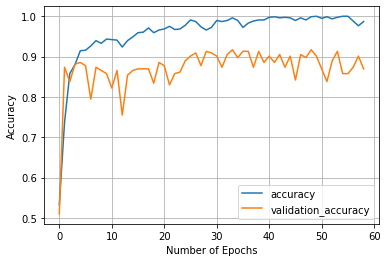

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

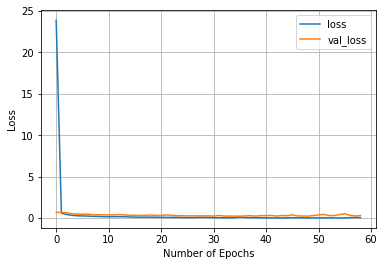

In [16]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


# Classification Report & Confusion Matrix

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

target_names = []

for key in train_gen.class_indices:
    target_names.append(key)


y_pred = model.predict_generator(valid_gen)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(valid_gen.classes, y_pred)

print (cm)

print('\n')

print('Classification Report')
print(classification_report(valid_gen.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  if __name__ == '__main__':


Confusion Matrix
[[116  11]
 [ 11 115]]


Classification Report
              precision    recall  f1-score   support

      Normal       0.91      0.91      0.91       127
     Seizure       0.91      0.91      0.91       126

    accuracy                           0.91       253
   macro avg       0.91      0.91      0.91       253
weighted avg       0.91      0.91      0.91       253



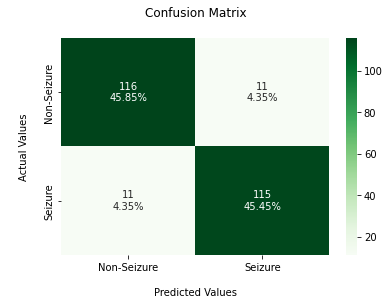

In [19]:
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
          
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, fmt = '' ,annot=labels, cmap = 'Greens')
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('\nActual Values\n');

ax.xaxis.set_ticklabels(['Non-Seizure','Seizure'])
ax.yaxis.set_ticklabels(['Non-Seizure','Seizure'])

plt.show()

# Plot of ROC(Receiver Operating Characteristic) Curve

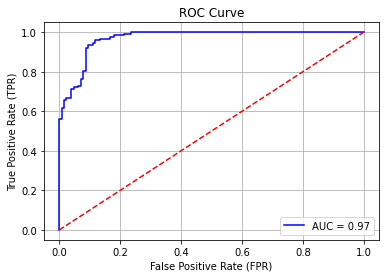

In [20]:
import sklearn.metrics as metrics
y_pred_keras = model.predict(valid_gen)
preds = y_pred_keras[:,1]
fpr_keras, tpr_keras, thresholds_keras = metrics.roc_curve(valid_gen.classes, preds)
roc_auc = metrics.auc(fpr_keras, tpr_keras)

plt.title('ROC Curve')
plt.plot(fpr_keras, tpr_keras, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.grid()
plt.show()

# Sample I/O Checking

In [21]:
from tensorflow.keras.preprocessing import image

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [23]:
def predictImage(file_name):
    image1 = image.load_img(file_name,target_size=(150,300))
    plt.imshow(image1)
    Y = image.img_to_array(image1)
    X = np.expand_dims(Y,axis=0)
    value = model.predict(X)
    v = np.argmax(value)
    print(v)
    if v == 1: 
        plt.xlabel("Seizure",fontsize= 20)
    elif v == 0:
        
        plt.xlabel("Non-Seizure",fontsize= 20)

1


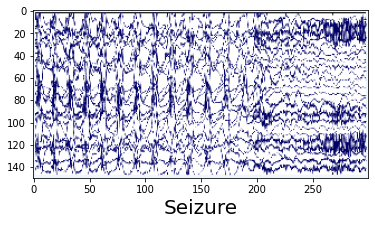

In [24]:
predictImage('/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/Seizure/394.PNG')

0


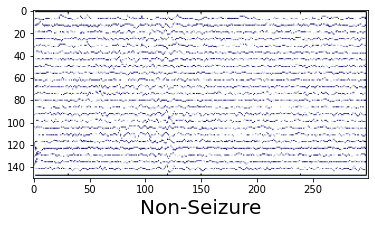

In [25]:
predictImage('/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/Normal/351.PNG')